### This notebook will focus on visualizing the chemical design space for our HBA and HBD basis set, so that we can also take into account diversity into selecting materials from our design space.

This code is borrowed from Pat Walters, his blog on this topic can be found here https://practicalcheminformatics.blogspot.com/2019/11/visualizing-chemical-space.html, and the github code here, https://github.com/PatWalters/workshop/blob/master/predictive_models/2_visualizing_chemical_space.ipynb

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

We will be testing this with our HBA basis set first since it is smaller

In [3]:
import sys

In [4]:
#adding path to pubchem folder which contains the basis set csv's
sys.path.insert(0,'../pubchem/')

In [5]:
hbd = pd.read_csv('../pubchem/HBD_basis_set.csv')


In [6]:
hbd.head(50)

,HBD_cid,HBD_smiles,Vendor Status,GHS_info,Health Score,SCALED Health,HEALTH PI,Environmental Score,SCALED ENV,ENV PI,HBD_InChIKey,HBD_MolecularFormula,HBD_MolecularWeight,SCALED MW,MW PI,HBD_mp,TOTAL PI,RANK
0,1176,C(=O)(N)N,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.0,18.0,XSQUKJJJFZCRTK-UHFFFAOYSA-N,CH4N2O,60.056,99.990009,26.997303,132,99.997303,1
1,522583,CC(N)O,True,"['H315', 'H319']",20,97.701149,53.735632,0,100.0,18.0,UJPKMTDFFUTLGM-UHFFFAOYSA-N,C2H7NO,61.080,98.313687,26.544695,no mp data,98.280328,2
2,71309146,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-VMIGTVKRSA-N,C3H8O,63.073,95.207141,25.705928,no mp data,94.912825,3
3,12213345,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-FIBGUPNXSA-N,C3H8O,63.110,95.151323,25.690857,no mp data,94.897754,4
4,11182567,CC(=O)O,True,"['H226', 'H312', 'H314']",75,91.379310,50.258621,0,100.0,18.0,QTBSBXVTEAMEQO-ZDOIIHCHSA-N,C2H4O2,62.037,96.797073,26.135210,no mp data,94.393830,5
5,2733137,C(CO)O,True,['H302'],50,94.252874,51.839080,0,100.0,18.0,LYCAIKOWRPUZTN-LNLMKGTHSA-N,C2H6O2,66.090,90.860947,24.532456,no mp data,94.371536,6
6,1030,CC(CO)O,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.0,18.0,DNIAPMSPPWPWGF-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-59,94.308319,7
7,12213346,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-WFGJKAKNSA-N,C3H8O,66.130,90.805988,24.517617,no mp data,93.724513,8
8,10442,C(CO)CO,True,['H315'],10,98.850575,54.367816,0,100.0,18.0,YPFDHNVEDLHUCE-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-26.7,93.676135,9
9,439846,CC(CO)O,True,['H319'],10,98.850575,54.367816,0,100.0,18.0,DNIAPMSPPWPWGF-VKHMYHEASA-N,C3H8O2,76.090,78.919700,21.308319,no mp data,93.676135,9


In [8]:
smiles_list = hbd.HBD_smiles.tolist()

In [9]:
smiles_list

['C(=O)(N)N',
 'CC(N)O',
 'CC(C)O',
 'CC(C)O',
 'CC(=O)O',
 'C(CO)O',
 'CC(CO)O',
 'CC(C)O',
 'C(CO)CO',
 'CC(CO)O',
 'CC(CO)O',
 'C(CO)O',
 'CCC(=O)O',
 'CC(CN)O',
 'CC(CN)O',
 'CC(C)O',
 'C(CO)CO',
 'CCC(=O)O',
 'CCC(=O)O',
 'CCC(=O)O',
 'CCC(=O)O',
 'C(=S)(N)N',
 'CCC(=O)O',
 'CCC(=O)O',
 'C=COCCO',
 'CC(C(=O)O)N',
 'CC(C(=O)O)N',
 'CC(CNC)O',
 'CC(CCO)O',
 'CC(C(C)O)O',
 'CC(CO)OC',
 'CC(COC)O',
 'CC(COC)O',
 'C(C(CO)O)O',
 'CCC(CO)O',
 'CCC(CO)O',
 'CCC(CO)O',
 'CC(=O)C(=O)O',
 'CCCC(=O)O',
 'CC(CO)NC',
 'CC(CO)NC',
 'CCCC(=O)O',
 'CC#CC(=O)O',
 'CCCC(=O)O',
 'CCCC(=O)OC',
 'CCCCC(C)O',
 'CCOC(C)CO',
 'CCC(COC)O',
 'CCC(CO)OC',
 'CCC(COC)O',
 'CC(CCO)OC',
 'C1=NC=NN1',
 'CCCC(=O)O',
 'C(C(C(=O)O)N)O',
 'CC(=O)C(=O)O',
 'C1=CN=CN1',
 'CCC(C(=O)O)N',
 'CC(CC(=O)O)N',
 'C1=CN=C(N1)N',
 'C(CO)N',
 'C(CO)N',
 'CC(=O)C(=O)O',
 'COCC(CF)O',
 'CC=CC1=CC=CO1',
 'CC=CC1=CC=CO1',
 'C#CC(C(=O)O)O',
 'CC(CCO)CO',
 'CCC(C)O',
 'CCC(C)O',
 'C1=C(NC=N1)O',
 'CC1=CC=CO1',
 'C(CO)N',
 'C1=CN=CN1',


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [10]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints from the HBA smiles

In [11]:
fp_list = fp_list_from_smiles_list(hbd.HBD_smiles)

100%|████████████████████████████████████████████████████████████████████████████| 3477/3477 [00:00<00:00, 5621.86it/s]


In [12]:
len(fp_list)

3477

In [13]:
fp_rank = list(range(1, 3478))

In [14]:
fp_rank

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

Perform principal component analysis (PCA) on the fingerprints.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
crds = pca.fit_transform(fp_list)

Put the coordinates from the PCA into a dataframe.

In [16]:
crds_df = pd.DataFrame(crds,columns=["PC_1","PC_2"])
crds_df['rank'] = fp_rank
crds_df.head()

,PC_1,PC_2,rank
0,0.700717,0.256172,1
1,0.407415,1.166102,2
2,0.347470,1.172447,3
3,0.347470,1.172447,4
4,0.941704,0.056939,5


Make a plot of the principal components. 

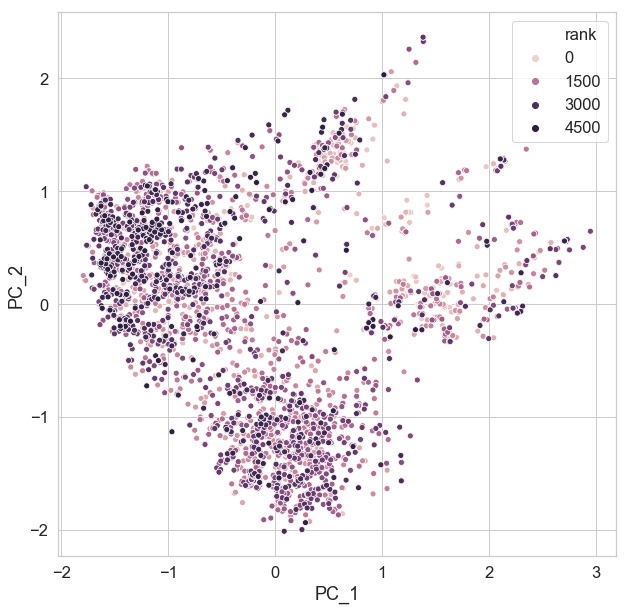

In [17]:
ax = sns.scatterplot(data=crds_df,x="PC_1",y="PC_2", hue="rank")

In [18]:
pca = PCA(n_components=50)
crds = pca.fit_transform(fp_list)

In [19]:
from sklearn.manifold import TSNE
%time crds_embedded = TSNE(n_components=2).fit_transform(crds)

Wall time: 23.1 s


In [20]:
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
tsne_df['rank'] = fp_rank

In [21]:

tsne_df.head()

,X,Y,rank
0,-47.663315,2.286109,1
1,-61.896255,-20.899462,2
2,-60.907032,-20.583021,3
3,-60.907120,-20.583391,4
4,-46.032780,5.421064,5


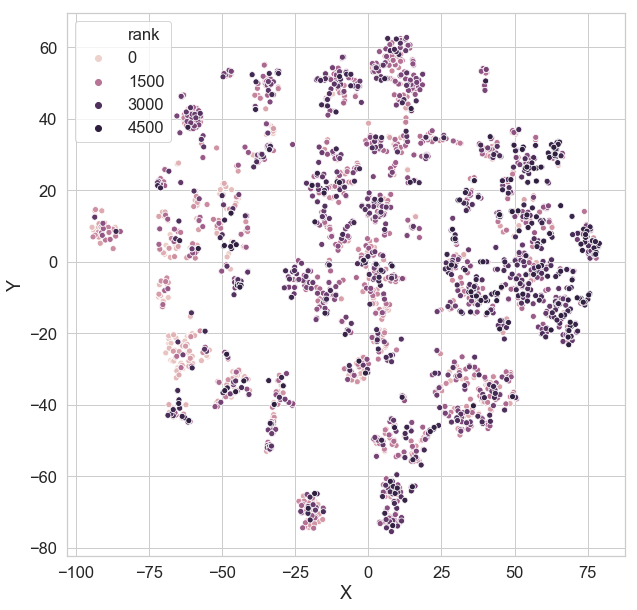

In [22]:
ax = sns.scatterplot(data=tsne_df,x="X",y="Y", hue="rank")

In [9]:


# def fp_as_array(mol,n_bits=2048):
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
#     arr = np.zeros((1,), np.int)
#     DataStructs.ConvertToNumpyArray(fp, arr)
#     return arr

# def fp_list_from_smiles_list(smiles_list,n_bits=2048):
#     fp_list = []
#     for smiles in smiles_list:
#         mol = Chem.MolFromSmiles(smiles)
#         fp_list.append(fp_as_array(mol,n_bits=2048))
#     return fp_list

In [10]:
# mol_list = []
# for smiles in smiles_list:
#     mol = Chem.MolFromSmiles(smiles)
#     mol_list.append(mol)
    

In [11]:
# mol_list

 None,
 None,

In [12]:
# def fp_list_from_mol_list(mol_list,n_bits=2048):
#     fp_list = []
#     for mol in mol_list:
#         fp_list.append(fp_as_array(mol,n_bits=2048))
#     return fp_list

In [16]:
# final_mol_list = []
# for mol in mol_list:
#     if mol != None:
#         final_mol_list.append(mol)

In [17]:
# final_mol_list